<a href="https://colab.research.google.com/github/SHREERAJ11/DL-Simplified/blob/main/Roadmark%20Detection/Models/baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json /.kaggle/

cp: cannot create regular file '/.kaggle/': Not a directory


In [ ]:
! chmod 600 /.kaggle/kaggle.json

chmod: cannot access '/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download pkdarabi/road-mark-detection

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/road-mark-detection
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 159M/161M [00:01<00:00, 102MB/s]
100% 161M/161M [00:01<00:00, 86.3MB/s]


In [ ]:
! unzip road-mark-detection.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/images/161b_jpg.rf.85f842102d7d7c6a3a8f9c93529c75b2.jpg  
  inflating: train/images/162a_jpg.rf.03425938f4f2d24be2e6c8a1686402ac.jpg  
  inflating: train/images/162b_jpg.rf.f9cad32427fe31938c0c0a01a4f47d4f.jpg  
  inflating: train/images/162c_jpg.rf.25bb41e5d59ec73f2db179022e1a9495.jpg  
  inflating: train/images/162d_jpg.rf.1fc78c1c28e08d111a29be67e80acd07.jpg  
  inflating: train/images/163_jpg.rf.6d8b5b078a7941ca338aa7019e8ec146.jpg  
  inflating: train/images/163b_jpg.rf.ae02ecd22abc81561cdc0397ef47a52c.jpg  
  inflating: train/images/164_jpg.rf.dd2ab2f31ab71fa5fbe6767d50a01a2c.jpg  
  inflating: train/images/165_jpg.rf.7a7719222c9d36709a26d63ee4df3567.jpg  
  inflating: train/images/165a_jpg.rf.a5c17a8f88f8d89629b569c341792808.jpg  
  inflating: train/images/165b_jpg.rf.f34b30ab4021c291d53f991b5c29a986.jpg  
  inflating: train/images/165d_jpg.rf.e3f350bc04c489fd5f5f1d714c152032.jpg  
  inflating: train/images/16

In [ ]:
# Importing initial required libraries
import os
import cv2
import numpy as np

In [ ]:
# Define the data directories
train_dir = '/content/train'
valid_dir = '/content/valid'
test_dir = '/content/test'

In [ ]:
# Function to load images and their corresponding labels
def load_images_and_labels(directory):
    images = []
    labels = []
    image_files = os.listdir(os.path.join(directory, 'images'))
    label_files = os.listdir(os.path.join(directory, 'labels'))
    for image_file in image_files:
        if image_file.endswith('.jpg'):
            img_path = os.path.join(directory, 'images', image_file)
            img = cv2.imread(img_path)
            if img is None:
                print(f'Failed to load image at path: {img_path}')
                continue
            label_file = image_file.replace('.jpg', '.txt')
            if label_file in label_files:
                label_path = os.path.join(directory, 'labels', label_file)
                with open(label_path, 'r') as f:
                    label = f.read().strip()
                    images.append(img)
                    labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
# Load the images and labels
train_images, train_labels = load_images_and_labels(train_dir)
valid_images, valid_labels = load_images_and_labels(valid_dir)
test_images, test_labels = load_images_and_labels(test_dir)

In [ ]:
# Printing the shape of data
print('Train images shape : ', train_images.shape)
print('Train labels shape : ', train_labels.shape)
print('Valid images shape : ', valid_images.shape)
print('Valid labels shape : ', valid_labels.shape)
print('Test images shape : ', test_images.shape)
print('Test labels shape : ', test_labels.shape)

Train images shape :  (2167, 640, 640, 3)
Train labels shape :  (2167,)
Valid images shape :  (417, 640, 640, 3)
Valid labels shape :  (417,)
Test images shape :  (192, 640, 640, 3)
Test labels shape :  (192,)


In [ ]:
# Print the number of unique labels
print('number of unique (train) labels : ', len(np.unique(train_labels)))

# Print the distribution of labels in the training set
unique, counts = np.unique(train_labels, return_counts=True)
print('Distribution of labels in the training set : ', dict(zip(unique, counts)))

number of unique (train) labels :  2167
Distribution of labels in the training set :  {'0 0 0.777971221875 0.12019230781250001 0.8360042734375 0.2690304484375 0.778133903125 0.1603565703125 0.7514245015625 0 0.7777121 0 0.777971221875': 1, '0 0.0033703703125 0.77614375 0.0502453703125 0.8066453125 0.11090648125 0.8311546875 0.1755518515625 0.8061 0.23682592656249998 0.773965625 0.146446296875 0.7505453125 0.0033703703125 0.77614375\n2 0.740621296875 0.9710890624999999 0.54826944375 0.7248546874999999 0.543528703125 0.7272640625 0.7226731484375 0.9728953125 0.740621296875 0.9710890624999999\n2 0.37488240781250004 0.9343656250000001 0.43685462968750005 0.8115484374999999 0.4544648140625 0.7700078125 0.45480277812500003 0.7615796875 0.42872685156249996 0.8067328125 0.3593046296875 0.932559375 0.37488240781250004 0.9343656250000001\n2 0.1388453703125 0.8278046874999999 0 0.8723546875 0.0023703703125 0.892825 0.14934351875000001 0.8380390625 0.31561944375 0.76579375 0.408747221875 0.7212437

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
unique_classes = np.unique(train_labels)
print("Unique classes in the dataset : ", unique_classes)

Unique classes in the dataset :  ['0 0 0.777971221875 0.12019230781250001 0.8360042734375 0.2690304484375 0.778133903125 0.1603565703125 0.7514245015625 0 0.7777121 0 0.777971221875'
 '0 0.0033703703125 0.77614375 0.0502453703125 0.8066453125 0.11090648125 0.8311546875 0.1755518515625 0.8061 0.23682592656249998 0.773965625 0.146446296875 0.7505453125 0.0033703703125 0.77614375\n2 0.740621296875 0.9710890624999999 0.54826944375 0.7248546874999999 0.543528703125 0.7272640625 0.7226731484375 0.9728953125 0.740621296875 0.9710890624999999\n2 0.37488240781250004 0.9343656250000001 0.43685462968750005 0.8115484374999999 0.4544648140625 0.7700078125 0.45480277812500003 0.7615796875 0.42872685156249996 0.8067328125 0.3593046296875 0.932559375 0.37488240781250004 0.9343656250000001\n2 0.1388453703125 0.8278046874999999 0 0.8723546875 0.0023703703125 0.892825 0.14934351875000001 0.8380390625 0.31561944375 0.76579375 0.408747221875 0.72124375 0.39960370312500004 0.7188343749999999 0.292590740625 

In [ ]:
num_classes = len(np.unique(train_labels))
print("Number of classes in the dataset : ", num_classes)

Number of classes in the dataset :  2167


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Initialize the label encoder
le = LabelEncoder()

In [ ]:
# Fit the label encoder on the combined labels from all sets and transform the labels
all_labels = np.concatenate([train_labels, valid_labels, test_labels])
le.fit(all_labels)
train_labels_encoded = le.transform(train_labels)
valid_labels_encoded = le.transform(valid_labels)
test_labels_encoded = le.transform(test_labels)

In [ ]:
train_encoded_classes = len(np.unique(train_labels_encoded))
valid_encoded_classes = len(np.unique(valid_labels_encoded))
test_encoded_classes = len(np.unique(test_labels_encoded))
print("Number of train labels encoded: ", train_encoded_classes)
print("Number of valid labels encoded: ", valid_encoded_classes)
print("Number of test labels encoded: ", test_encoded_classes)

Number of train labels encoded:  2167
Number of valid labels encoded:  417
Number of test labels encoded:  192


In [ ]:
from keras.utils import to_categorical

In [ ]:
# One-hot encode the labels
train_labels_onehot = to_categorical(train_labels_encoded, num_classes=len(le.classes_))
valid_labels_onehot = to_categorical(valid_labels_encoded, num_classes=len(le.classes_))
test_labels_onehot = to_categorical(test_labels_encoded, num_classes=len(le.classes_))

In [ ]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(640, 640, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(le.classes_), activation='softmax'))

In [ ]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 638, 638, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 319, 319, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 317, 317, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 158, 158, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 156, 156, 64)      36928     
                                                                 
 flatten_1 (Flatten)         (None, 1557504)          

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels_onehot, epochs=10, validation_data=(valid_images, valid_labels_onehot))

Epoch 1/10
68/68 [==============================] - 49s 492ms/step - loss: 79.3733 - accuracy: 0.0000e+00 - val_loss: 7.9590 - val_accuracy: 0.0000e+00
Epoch 2/10
68/68 [==============================] - 23s 336ms/step - loss: 7.9124 - accuracy: 4.6147e-04 - val_loss: 8.0494 - val_accuracy: 0.0000e+00
Epoch 3/10
68/68 [==============================] - 23s 341ms/step - loss: 7.8046 - accuracy: 0.0051 - val_loss: 8.2785 - val_accuracy: 0.0000e+00
Epoch 4/10
68/68 [==============================] - 23s 342ms/step - loss: 7.1114 - accuracy: 0.0083 - val_loss: 9.6860 - val_accuracy: 0.0000e+00
Epoch 5/10
68/68 [==============================] - 23s 341ms/step - loss: 6.0924 - accuracy: 0.0425 - val_loss: 10.3052 - val_accuracy: 0.0000e+00
Epoch 6/10
68/68 [==============================] - 23s 338ms/step - loss: 4.8933 - accuracy: 0.1255 - val_loss: 12.6149 - val_accuracy: 0.0000e+00
Epoch 7/10
68/68 [==============================] - 23s 340ms/step - loss: 3.7024 - accuracy: 0.2746 - val_

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Predict on validation data
valid_predictions = model.predict(valid_images)
valid_predictions = np.argmax(valid_predictions, axis=1)  # Convert probabilities to class labels

14/14 [==============================] - 1s 86ms/step


In [ ]:
# Calculate Metrics
print("Classification Report:")
print(classification_report(valid_labels_encoded, valid_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          35       0.00      0.00      0.00       1.0
          36       0.00      0.00      0.00       1.0
          43       0.00      0.00      0.00       1.0
          44       0.00      0.00      0.00       1.0
          46       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       0.0
          60       0.00      0.00      0.00       0.0
          63       0.00      0.00      0.00       0.0
          68       0.00      0.00      0.00       1.0
          73       0.00      0.00      0.00       1.0
          77       0.00      0.00      0.00       1.0
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
import seaborn as sns

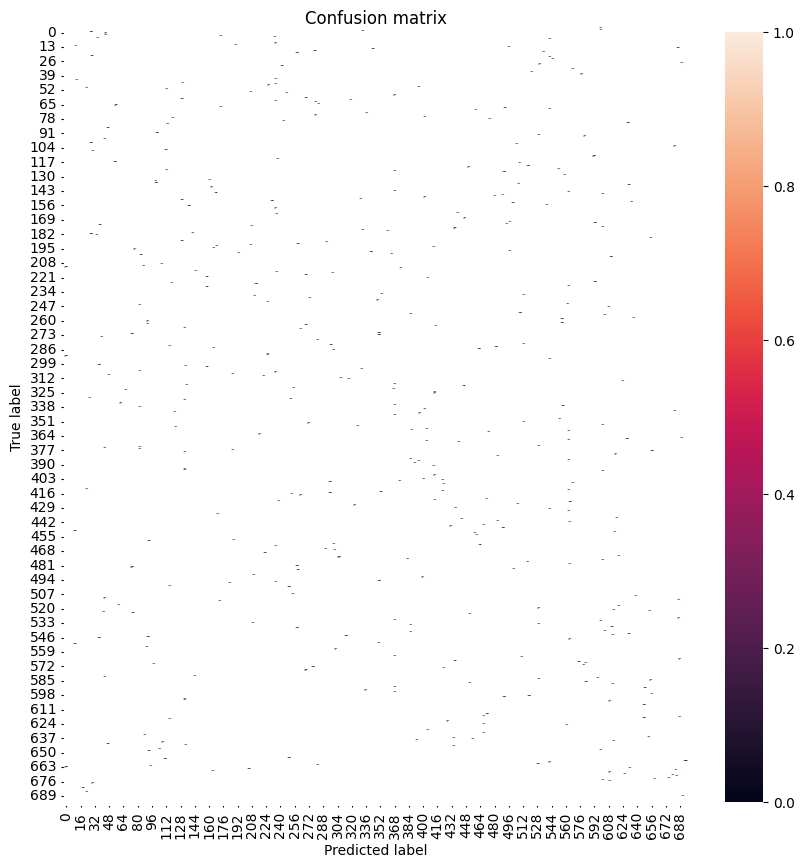

In [ ]:
# Confusion Matrix
cm = confusion_matrix(valid_labels_encoded, valid_predictions)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Print the final accuracy for the validation set
print("Final validation accuracy: ", history.history['val_accuracy'][-1])

Final validation accuracy:  0.0
